In [ ]:
#INTEGRANTES: LUISA MARÍA HERNÁNDEZ QUINTERO, CAROLINA TABORDA VARGAS
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
# Leer archivo Excel y usar la segunda fila como encabezado
df = pd.read_excel("FLIR_groups1and2.xlsx", header=1)

# Verificar que es un DataFrame
         
print(df.head())


In [2]:
#Análisis exploratorio de datos

#Promedio de la variable Max1R13_
df = pd.read_excel("FLIR_groups1and2.xlsx", header=2)
columna=df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1)
df_promedio = pd.DataFrame(columna, columns=['promedio_max'])
print(f"El promedio de Max1R13_ es: \n {df_promedio}")

#Tipos de datos: Variables numéricas y Variables categóricas
variables_numericas = ['aveOralM', 'Age', 'T_atm', 'Humidity', 'Max1R13_']
variables_categoricas = ['Gender', 'Ethnicity', 'Cosmetics']



El promedio de Max1R13_ es: 
       promedio_max
0          35.0300
1          34.5500
2          35.6525
3          35.2225
4          35.5450
...            ...
1015       35.6425
1016       35.9825
1017       36.4075
1018       35.8150
1019       35.7075

[1020 rows x 1 columns]


In [44]:
#Construcción de un DataFrame

#Tipos de datos: Variables numéricas y Variables categóricas

list_1=df['aveOralM'].tolist()
list_2=df['Gender'].tolist()
list_3=df['Age'].tolist()
list_4=df['Ethnicity'].tolist()
list_5=df['T_atm'].tolist()
list_6=df['Humidity'].tolist()
list_7 = df['Cosmetics'].map({1: "Cosmético aplicado", 0: "No aplicado"}).tolist()
list_8=df_promedio['promedio_max'].tolist()

def valores_estadisticos(valores):
    # Convertir a numpy array por seguridad
    valores = np.array(valores)

    # Si no son numéricos (excepto moda), devolver NaN
    if not np.issubdtype(valores.dtype, np.number):
        media = mediana = sd = mad = varianza = iqr = cv = cvm = np.nan
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
    else:
        media = np.mean(valores)
        mediana = np.median(valores)
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
        sd = np.std(valores, ddof=1)
        mad = np.mean(np.abs(valores - np.mean(valores)))
        varianza = np.var(valores, ddof=1)
        iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
        cv = sd / media if media != 0 else np.nan
        cvm = mad / media if media != 0 else np.nan

    return [media, mediana, moda, sd, mad, varianza, iqr, cv, cvm]
      
variables = {
    'aveOralM': list_1,
    'Gender': list_2,
    'Age': list_3,
    'Ethnicity': list_4,
    'T_atm': list_5,
    'Humidity': list_6,
    'Cosmetics': list_7,
    'promedio_Max1R13_': list_8,

}

# Calculamos los valores estadísticos por variable
estadisticas = {nombre: valores_estadisticos(lista) for nombre, lista in variables.items()}

# Convertimos a DataFrame con los nombres de filas
estadisticas_df = pd.DataFrame(estadisticas, index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"])

# Mostramos el resultado
print(estadisticas_df)






           aveOralM  Gender    Age Ethnicity      T_atm    Humidity  \
Media     37.028382     NaN    NaN       NaN  24.115392   28.723039   
Mediana   36.940000     NaN    NaN       NaN  24.000000   26.300000   
Moda      36.890000  Female  18-20     White  24.000000   30.000000   
SD         0.509502     NaN    NaN       NaN   1.336338   13.071627   
MAD        0.332741     NaN    NaN       NaN   0.956887   10.844331   
Varianza   0.259593     NaN    NaN       NaN   1.785798  170.867427   
IQR        0.362500     NaN    NaN       NaN   1.300000   18.600000   
CV         0.013760     NaN    NaN       NaN   0.055414    0.455092   
CVM        0.008986     NaN    NaN       NaN   0.039680    0.377548   

            Cosmetics  promedio_Max1R13_  
Media             NaN          35.596533  
Mediana           NaN          35.548750  
Moda      No aplicado          35.677500  
SD                NaN           0.574888  
MAD               NaN           0.418881  
Varianza          NaN          

Calculo del coeficiente de variación de los datos 

In [45]:
razon_sd_mad = estadisticas_df.loc['SD'] /estadisticas_df.loc['MAD']
razon_sd_media = estadisticas_df.loc['SD'] /estadisticas_df.loc['Media']*100
print("Razón SD/MAD:\n")
print(razon_sd_mad)
print("Razón SD/Media:\n")
print(razon_sd_media)


Razón SD/MAD:

aveOralM             1.531226
Gender                    NaN
Age                       NaN
Ethnicity                 NaN
T_atm                1.396547
Humidity             1.205388
Cosmetics                 NaN
promedio_Max1R13_    1.372437
dtype: object
Razón SD/Media:

aveOralM              1.375978
Gender                     NaN
Age                        NaN
Ethnicity                  NaN
T_atm                  5.54143
Humidity             45.509205
Cosmetics                  NaN
promedio_Max1R13_     1.615011
dtype: object


In [ ]:

def detectar_outliers(lista):
    datos = np.array(lista)
    
    # Calcular Q1, Q3 e IQR
    Q1 = np.percentile(datos, 25)
    Q3 = np.percentile(datos, 75)
    IQR = Q3 - Q1

    # Límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Detectar valores fuera del rango
    outliers = datos[(datos < limite_inferior) | (datos > limite_superior)]

    # Verificar si hay atípicos
    hay_atipicos = len(outliers) > 0
    cantidad = len(outliers)

    return outliers, hay_atipicos, cantidad



outliers_1, hay_atipicos_1, cantidad_1 = detectar_outliers(list_1)
print("Outliers encontrados en aveOralM  :", outliers_1)
print("¿Hay datos atípicos en aveOralM ?", hay_atipicos_1)
print("Cantidad de datos atípicos en aveOralM :", cantidad_1)

outliers_5, hay_atipicos_5, cantidad_5 = detectar_outliers(list_5)
print("Outliers encontrados en list_5:", outliers_5)
print("¿Hay datos atípicos en list_5?", hay_atipicos_5)
print("Cantidad de datos atípicos en list_5:", cantidad_5)

outliers_6, hay_atipicos_6, cantidad_6 = detectar_outliers(list_6)
print("Outliers encontrados en list_6:", outliers_6)
print("¿Hay datos atípicos en list_6?", hay_atipicos_6)
print("Cantidad de datos atípicos en list_6:", cantidad_6)

outliers_8, hay_atipicos_8, cantidad_8 = detectar_outliers(list_8)
print("Outliers encontrados en list_7:", outliers_8)
print("¿Hay datos atípicos en list_7?", hay_atipicos_8)
print("Cantidad de datos atípicos en list_7:", cantidad_8)



KeyError: 'aveOralM'

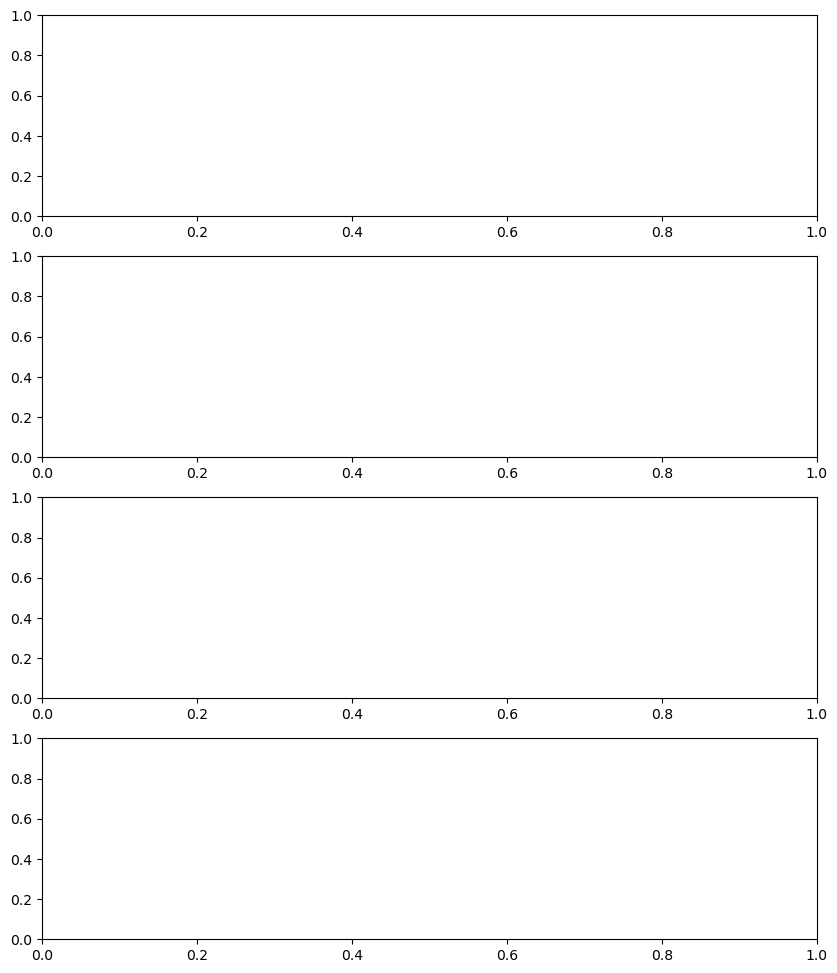

In [ ]:
#Histogramas
fig, ax = plt.subplots(4, 1, figsize=(10, 12))

ax[0].hist(df['aveOralM'], bins=10, color='skyblue', edgecolor='black')
ax[0].set_xlabel("aveOralM")
ax[0].set_ylabel("Frecuencia")

ax[1].hist(df['T_atm'], bins=10, color='lightgreen', edgecolor='black')
ax[1].set_xlabel("T_atm (°C)")
ax[1].set_ylabel("Frecuencia")

ax[2].hist(df['Humidity'], bins=10, color='salmon', edgecolor='black')
ax[2].set_xlabel("Humidity")
ax[2].set_ylabel("Frecuencia")

ax[3].hist(df['Promedio_Max1R13_'], bins=10, color='plum', edgecolor='black')
ax[3].set_xlabel("Promedio_Max1R13_")
ax[3].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()